In [5]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 73.6 MB/s eta 0:00:00


In [52]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import numpy as np
from shapely.geometry import Point

In [53]:
plot_location = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/california/neon-sjer-site/vector_data')

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'vector_data': 'SJER_plot_centroids' (default), 'SJER_crop', 'SJER_crop2'. Specify layer parameter to avoid this warning.
  result = read_func(


In [54]:
plot_location.head()
plot_location.tail()

,Plot_ID,Point,northing,easting,plot_type,geometry
13,SJER4,center,4109767.289,257228.336,trees,POINT (257228.336 4109767.289)
14,SJER8,center,4110249.265,254738.618,trees,POINT (254738.618 4110249.265)
15,SJER824,center,4110047.586,256185.584,soil,POINT (256185.584 4110047.586)
16,SJER916,center,4109616.679,257460.486,soil,POINT (257460.486 4109616.679)
17,SJER952,center,4110759.039,255871.194,grass,POINT (255871.194 4110759.039)


In [55]:
plot_location.geom_type

,0
0,Point
1,Point
2,Point
3,Point
4,Point
5,Point
6,Point
7,Point
8,Point
9,Point


In [56]:
type(plot_location)

geopandas.geodataframe.GeoDataFrame

In [57]:
plot_location.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
plot_location.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [59]:
plot_location.shape

(18, 6)

<Axes: >

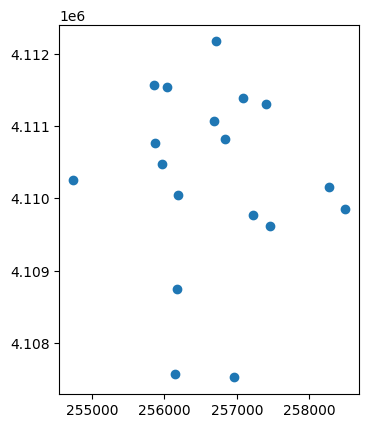

In [60]:
plot_location.plot()

<Axes: >

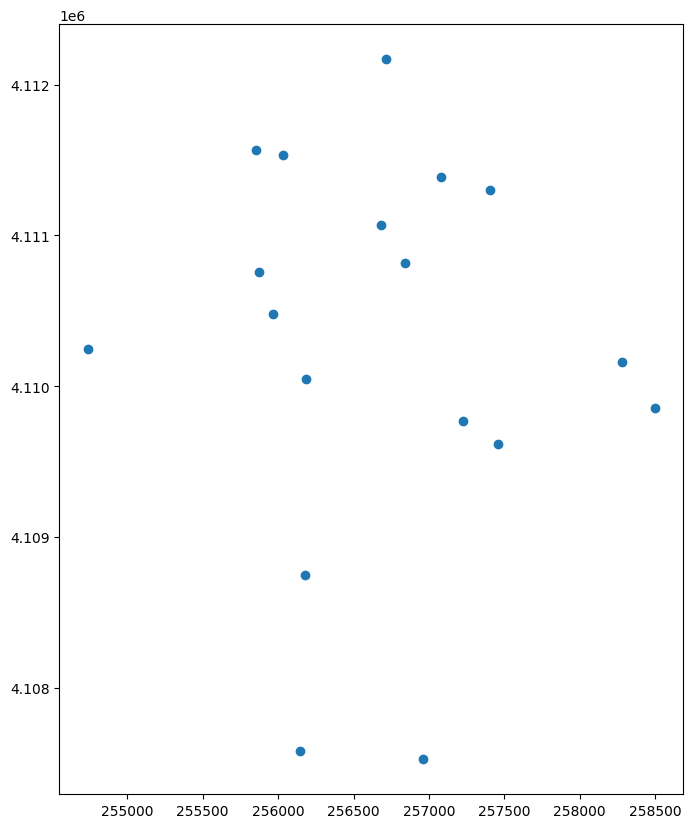

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_location.plot(ax=ax)

<Axes: >

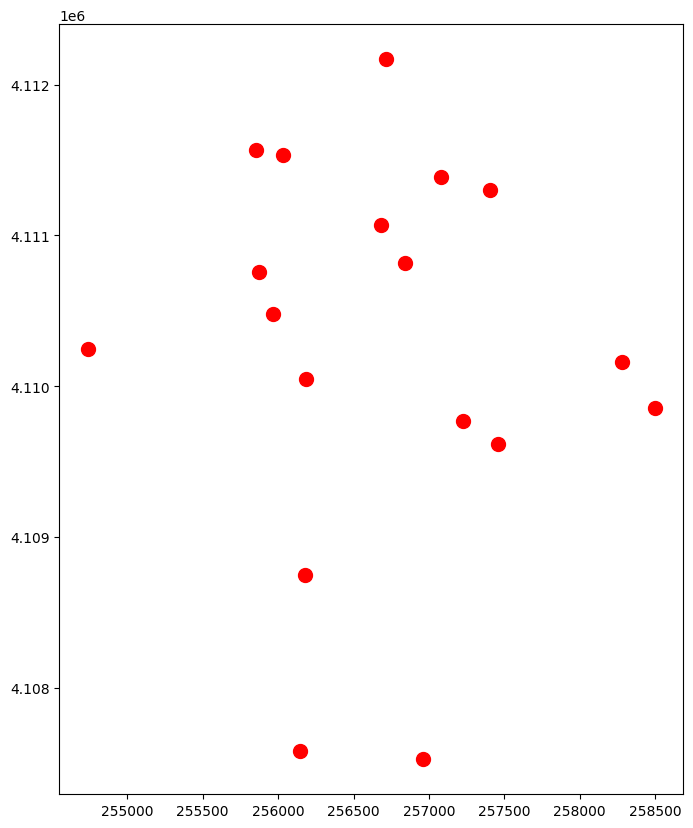

In [62]:
fig, ax1 = plt.subplots(figsize=(10, 10))
plot_location.plot(ax=ax1, color='red', markersize=100)

<Axes: >

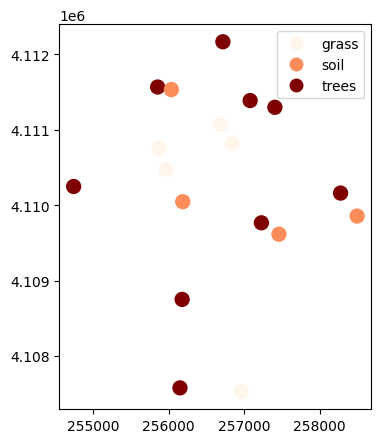

In [63]:
fig, ax2 = plt.subplots(figsize=(5, 5))
plot_location.plot(column='plot_type',ax=ax2, legend=True, cmap='OrRd', categorical=True,markersize=100)

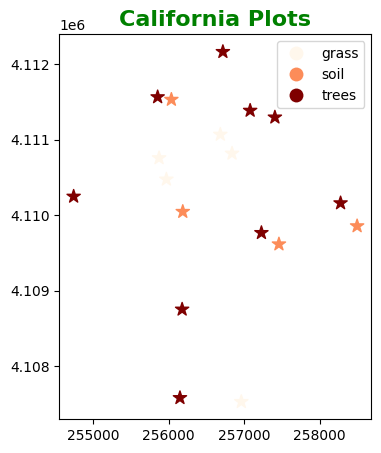

In [64]:
fig, ax3 = plt.subplots(figsize=(5, 5))
plot_location.plot(column='plot_type',ax=ax3, legend=True, cmap='OrRd', categorical=True,marker='*',markersize=100)
ax3.set_title('California Plots', fontsize=16, fontweight='bold', color='green', fontname='Rockwell')
plt.show()

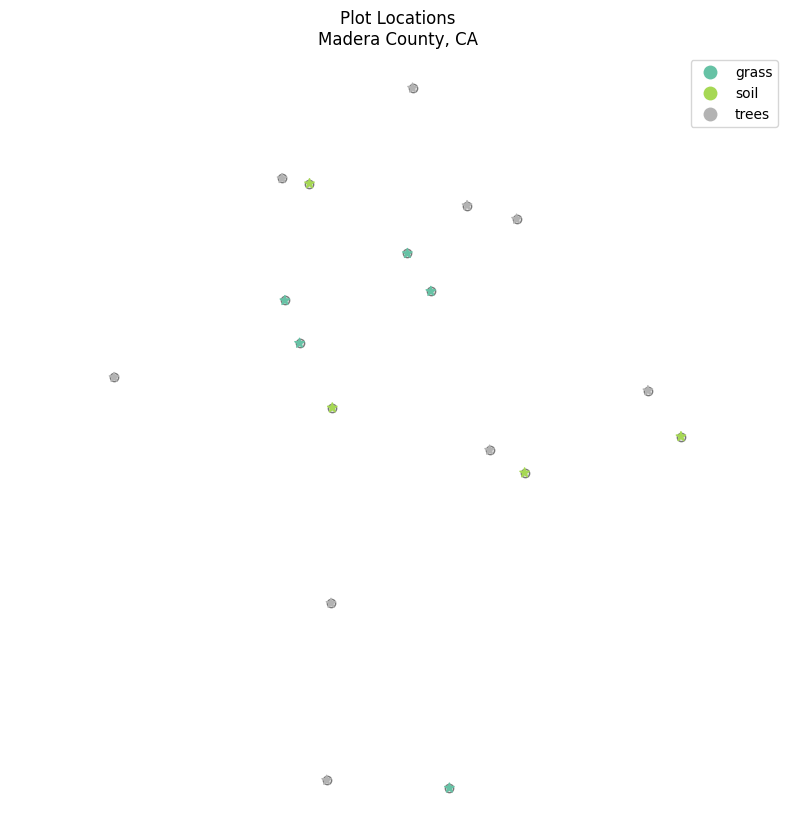

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
plot_location.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same a
plot_location.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()

<Axes: >

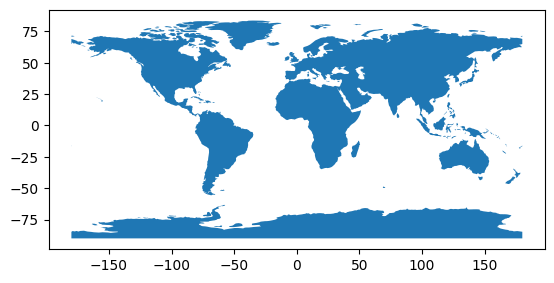

In [66]:
world= gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/global/ne_110m_land')
world.plot()

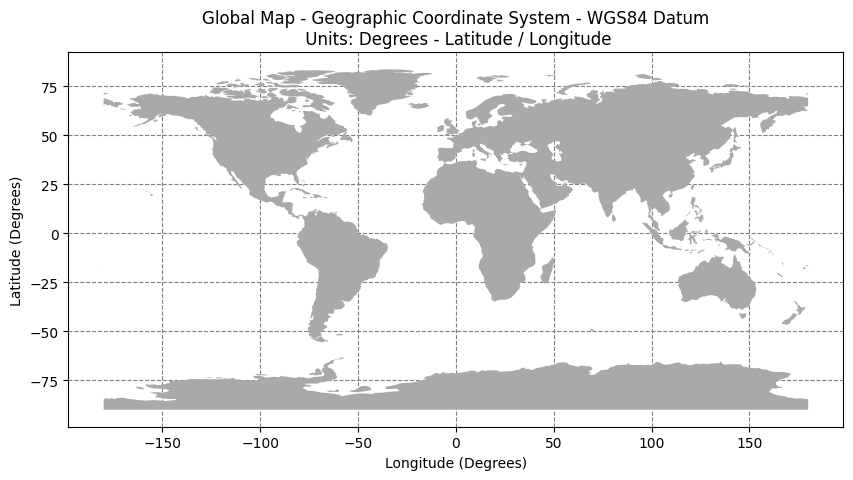

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
world.plot(color='darkgrey',
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray',
              linestyle='dashed')
ax.xaxis.grid(color='gray',
              linestyle='dashed')

In [94]:
# Create numpy array of x,y point locations
add_points = np.array([[90.4125, 23.8103  ],
                       [  -74.0060 ,   40.7128 ]])

# Turn points into list of x,y shapely points
city_locations = [Point(xy) for xy in add_points]
city_names = ['Dhaka', 'New York']
city_locations

[<POINT (90.412 23.81)>, <POINT (-74.006 40.713)>]

In [113]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_names,
                                  geometry=city_locations,
                                  crs=world.crs)
city_locations

ValueError: Must pass array with one dimension only.

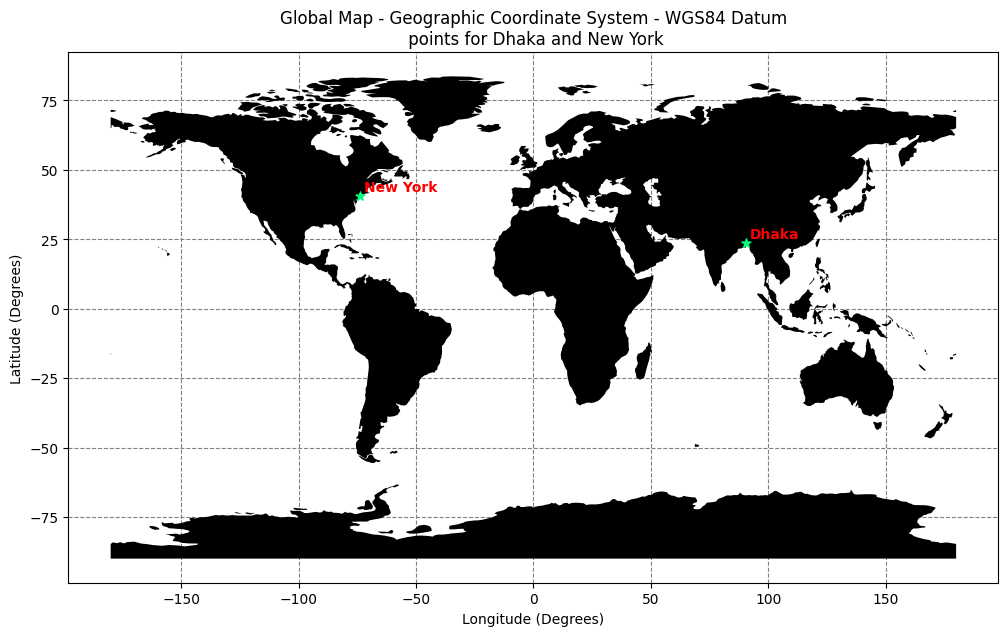

In [112]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

world.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax,
                    color='springgreen',
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n points for Dhaka and New York")
for x, y, label in zip(city_locations.geometry.x, city_locations.geometry.y, city_locations['city_names']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color="red", fontweight='bold')
#
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')